## Dimensinality reduction

In [1]:
import pandas as pd
from utils import import_df

df = import_df("2-data-generation-output.json")
df

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_f3,vib_y_kurt,vib_y_peak,vib_y_vel,vib_z_acc,vib_z_kurt,vib_z_peak,vib_z_vel,current,label
0,-0.068780,-4.477798,-6.905241,-4.547951,-2.283589,-0.124857,-1.274090,-0.499428,-1.128634,-0.117876,...,1.760176,0.521458,0.685517,2.844896,1.684042,0.362336,0.576215,2.100146,3.967956,working-engine-1
1,0.368391,-5.471160,-5.840925,-3.531701,-1.571756,-1.326505,-1.415999,0.166629,-0.261158,-0.461204,...,0.506051,0.530757,0.740439,2.838546,1.700080,0.352717,0.611753,2.122022,3.950103,working-engine-1
2,0.063973,-5.670291,-6.273518,-3.701076,-2.121080,-0.683337,-1.354200,-0.224765,-0.041428,-0.458915,...,1.760176,0.520424,0.724166,2.835371,1.668003,0.353037,0.573677,2.068546,3.950103,working-engine-1
3,-0.116846,-5.862554,-6.252918,-3.568322,-2.457542,-0.948844,-0.878119,-0.618448,0.189746,0.184253,...,0.242024,0.523180,0.756713,2.863947,1.684042,0.358809,0.581292,2.100146,3.960632,working-engine-1
4,-0.380064,-5.342985,-6.486381,-3.854429,-2.130236,-1.038109,-0.688144,0.228428,-0.586175,-0.323873,...,1.683168,0.518702,0.752644,2.848071,1.684042,0.353679,0.596522,2.102577,3.961089,working-engine-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,0.580068,2.188554,0.679953,-0.522939,-0.533190,0.339840,0.622341,-0.257775,0.493568,-0.480809,...,0.826170,1.001442,1.019799,1.109308,0.996471,1.004388,1.019314,1.167767,3.938747,working-engine-2
31796,0.061668,3.011355,0.853147,-0.164021,-0.020543,-0.592657,0.367713,-0.329754,-0.064930,-0.259570,...,0.533500,1.009292,1.001777,1.039160,1.017857,0.944582,0.886866,1.146581,3.939537,working-engine-2
31797,-0.030359,2.044904,0.861929,-0.768672,0.164520,0.148981,-0.019003,-0.045168,-0.612308,-0.229635,...,1.196065,0.968148,0.924510,1.046756,1.017857,1.020822,1.027063,1.173927,3.946964,working-engine-2
31798,-0.199270,2.302485,0.328978,-0.529078,0.071339,0.144841,0.110905,-0.199757,0.393857,0.123578,...,0.252852,1.016121,1.064724,1.016276,0.994626,0.987197,0.994516,1.166936,3.943306,working-engine-2


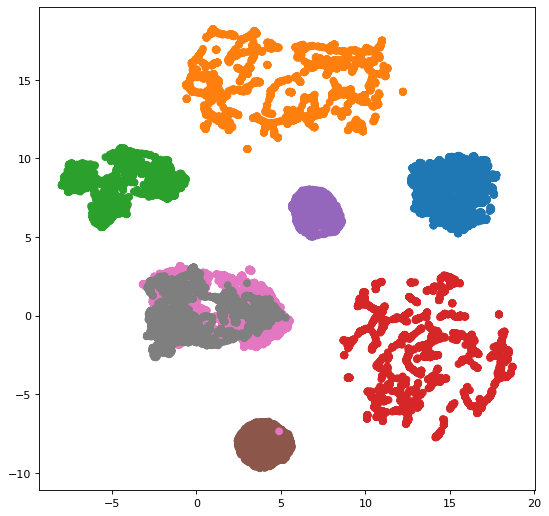

In [2]:
import umap
from matplotlib import pyplot as plt
import seaborn as sns

df_dr = df.drop(["label"], axis=1)
reducer = umap.UMAP()
embedding = reducer.fit_transform(df_dr)

c=[sns.color_palette()[x] for x in pd.factorize(df.label)[0]]
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(embedding[:, 0], embedding[:, 1], c=c)
plt.show()

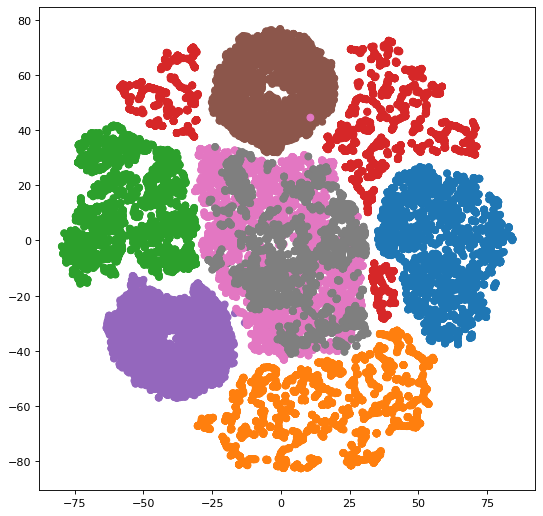

In [3]:
from sklearn.manifold import TSNE
reducer = TSNE()
embedding= reducer.fit_transform(df_dr)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(embedding[:, 0], embedding[:, 1],c=c)

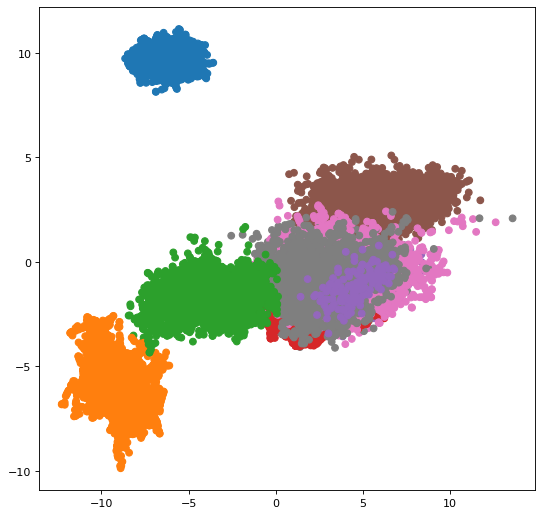

In [4]:
from sklearn.decomposition import PCA
reducer = PCA()
embedding= reducer.fit_transform(df_dr)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(embedding[:, 0], embedding[:, 1],c=c)

In [5]:
import seaborn as sns
import warnings

# with warnings.catch_warnings():
#     sns.pairplot(
#         df.reset_index()[[
#             # 's_00', 's_01', 's_02', 's_03', 's_04', 's_05', 's_06', 's_07', 's_08', 's_09', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19',
#             'sonic_custom', 'sonic_rmslog',
#             'vib_x_acc', 'vib_x_kurt', 'vib_x_peak', 'vib_x_vel',
#             'vib_y_acc', 'vib_y_kurt', 'vib_y_peak', 'vib_y_vel',
#             'vib_z_acc', 'vib_z_kurt', 'vib_z_peak', 'vib_z_vel',
#             'temperature_external', 'current',
#             'label'
#         ]],
#         kind="kde",
#         hue="label",
#         corner=True
#     )

## Models

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dr, df.label_int, test_size=0.20, random_state=42)

AttributeError: 'DataFrame' object has no attribute 'label_int'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
acc = (pred == y_test).sum() / len(X_test)
print(f"{acc:.0%}")

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
clf.predict(X_test)
acc = (pred == y_test).sum() / len(X_test)
print(f"{acc:.0%}")

## Root mean square error
Requires a prediction to have an error

In [ ]:
# # df_loc = df.loc[df["time"] == "2021-10-27 17:32:32.494"]
# df_loc = df.loc[df["time"] >= "2021-10-31 12:05:52.937"]
# print(df_loc.mean())
# df_loc

## Mesurements (For models)
